In [1]:
#time tracking
import time 

tmps = time.time()
def tmp():
	global tmps
	x = time.time() - tmps
	tmps = time.time()
	return x

#Import
import torch
from torch.utils import data
import torchvision as tv
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

import os
from random import choice
from PIL import Image
import cv2

print(" import time : %f" %(tmp()))


 import time : 2.474542


In [2]:
#Device set
if torch.cuda.is_available():
	device=torch.device("cuda:3")
else:
	device=torch.device("cpu")
print("using device %s"%(device))

using device cpu


image name is : Rejected_19.png


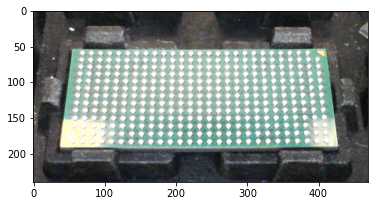

(240, 470, 3)


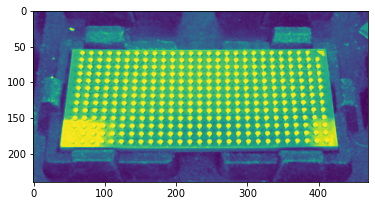

(1, 240, 470)
 image setup time : 3.730426


In [35]:
#Image cropped
left=280
right=750
top=350
bottom=590

img_height = 240
img_width = 470
num_classes = 2

classes = ('valid', 'invalid')


images = [i for i in os.listdir("Validation_Pictures")]
img_name = choice(images)
print("image name is : %s"%(img_name))

#image = cv2.imread("Validation_Pictures/%s"%(img_name))
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#image = image[top:bottom,left:right]

image = Image.open("Validation_Pictures/%s"%(img_name))
image = image.crop((left, top, right, bottom))

plt.imshow(image)
plt.show()

data = np.asarray(image)
print(data.shape)


transform = tv.transforms.Compose([tv.transforms.ToTensor(),
	tv.transforms.Grayscale(num_output_channels=1),
	tv.transforms.Normalize((0.5), (0.5))])

image = transform(image)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(image)

data = np.asarray(image)
print(data.shape)
    
image = image.unsqueeze(0)

print(" image setup time : %f" %(tmp()))

In [34]:
#model
class Sequential(nn.Module):
	def __init__(self):
		super(Sequential,self).__init__()
		self.conv1=nn.Conv2d(1, 16, 3)
		self.conv2=nn.Conv2d(16, 32, 3)
		self.conv3=nn.Conv2d(32, 64, 3)
		#self.conv4=nn.Conv2d(64, 128, 3)
		self.pool=nn.MaxPool2d(2, 2)
		#self.lin_size = 64*(img_height//8)*(img_width//8) #supposé juste...
		self.lin_size = 102144
		self.fc1=nn.Linear(self.lin_size, 256)
		self.fc2=nn.Linear(256, 128)
		self.fc3=nn.Linear(128, 32)
		self.fc4=nn.Linear(32, num_classes)
	def forward(self, x):
		x=self.pool(F.relu(self.conv1(x)))
		x=self.pool(F.relu(self.conv2(x)))
		x=self.pool(F.relu(self.conv3(x)))
		#x=self.pool(F.relu(self.conv4(x)))
		x=x.view(x.size(0), -1)
		x=F.relu(self.fc1(x))
		x=F.relu(self.fc2(x))
		x=F.relu(self.fc3(x))
		return self.fc4(x)

model=torch.load("mymodel_robot.pth", map_location=torch.device(device))
model.to(device)

print(" model setup time : %f" %(tmp()))

 model setup time : 1.688460


In [ ]:
image = image.to(device)
outputs = model(image)
_, predic = torch.max(outputs, 1)
print(predic)

sm = nn.Softmax(dim=1) 
sm_outputs = sm(outputs) 
_, predictions = torch.max(sm_outputs, 1)
print(predictions)

pred = predictions.item()
print("Name : %s"%(img_name))
print("Prediction : %s with %i"%(classes[predic], pred*100), end="%.")

In [ ]:
#Image cropped
left=280
right=750
top=350
bottom=590

img_height = 240
img_width = 470
num_classes = 2

classes = ('valid', 'invalid')


images = [i for i in os.listdir("Validation_Pictures")]
for img_name in images:
    print("image name is : %s"%(img_name))

    image = Image.open("Validation_Pictures/%s"%(img_name))
    image = image.crop((left, top, right, bottom))

    plt.imshow(image)
    plt.show()

    transform = tv.transforms.Compose([tv.transforms.ToTensor(),
        tv.transforms.Grayscale(num_output_channels=1),
        tv.transforms.Normalize((0.5), (0.5))])

    image = transform(image)
    image = image.unsqueeze(0)

    print(" image setup time : %f" %(tmp()))



    image = image.to(device)
    outputs = model(image)
    print (outputs)
    a, predic = torch.max(outputs, 1)
    print("a : ",a)
    print("prediction : ",predic)

    sm = nn.Softmax(dim=1) 
    sm_outputs = sm(outputs) 
    aa, predictions = torch.max(sm_outputs, 1)
    print("aa : ",aa)
    print(predictions)
    
    print(torch.argmax(outputs))

    pred = predictions.item()
    print("Name : %s"%(img_name))
    print("Prediction : %s with %i"%(classes[predic], pred*100), end="%.\n")